**BIAS**

In machine learning, "bias" refers to the error introduced by approximating a real-world problem with a simplified model. It represents the difference between the predicted output of the model and the true output (often represented as the expected value or target) that we are trying to predict.

Bias is closely related to the concept of underfitting. When a model has high bias, it fails to capture the underlying patterns of the data.

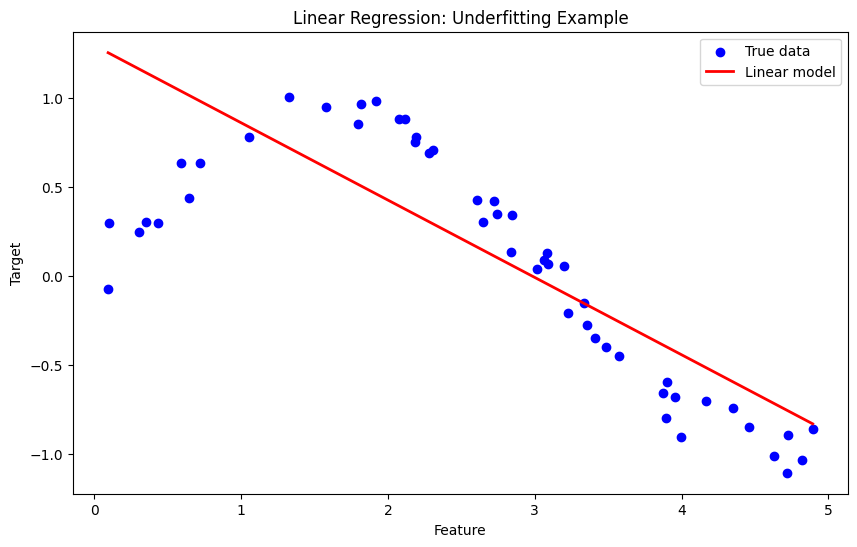

Train Error (MSE): 0.14
Test Error (MSE): 0.35


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generating synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(50) * 0.1  # True relationship + noise

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Fiting a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training set
y_pred_train = model.predict(X_train)

# Predict on test set
y_pred_test = model.predict(X_test)

# Plot outputs
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='True data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear model')

plt.title('Linear Regression: Underfitting Example')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Calculate mean squared error
train_error = mean_squared_error(y_train, y_pred_train)
test_error = mean_squared_error(y_test, y_pred_test)
print(f'Train Error (MSE): {train_error:.2f}')
print(f'Test Error (MSE): {test_error:.2f}')


**VARIANCE**

"variance" refers to the amount by which the model's prediction would change if we trained it on a different dataset. It quantifies the sensitivity of the model to the randomness in the training data. A model with high variance is overly sensitive to the noise in the training data, which can lead to overfitting.

Train Error (MSE): 0.01
Test Error (MSE): 0.94


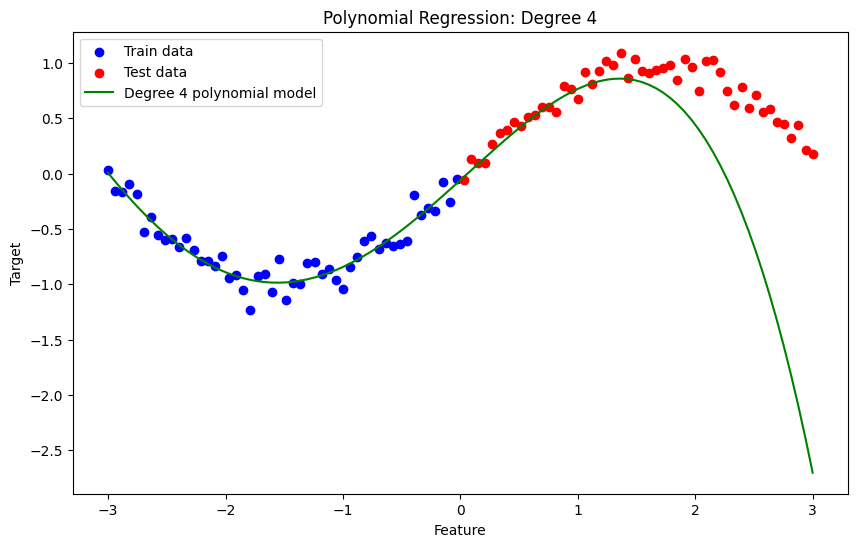

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, size=X.shape)  # True relationship + noise

# Split the data into training and test sets
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]
y_test = y[50:]

# Fit polynomial regression model of degree 4
degree = 4
polynomial_features = PolynomialFeatures(degree=degree)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict on training set
y_pred_train = model.predict(X_poly_train)

# Predict on test set
y_pred_test = model.predict(X_poly_test)

# Plot outputs
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='red', label='Test data')

X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = polynomial_features.transform(X_plot)
plt.plot(X_plot, model.predict(X_plot_poly), color='green', label=f'Degree {degree} polynomial model')

# Calculate mean squared error
train_error = mean_squared_error(y_train, y_pred_train)
test_error = mean_squared_error(y_test, y_pred_test)
print(f'Train Error (MSE): {train_error:.2f}')
print(f'Test Error (MSE): {test_error:.2f}')

plt.title(f'Polynomial Regression: Degree {degree}')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


**DEEP NEURAL NETWORKS**

A deep neural network (DNN) is a type of artificial neural network (ANN) that consists of multiple layers of interconnected neurons, hence the term "deep," indicating its depth in terms of layer hierarchy. These networks are capable of learning hierarchical representations of data and are widely used for various machine learning tasks such as image and speech recognition, natural language processing, and more.


**INPUT LAYER**

The input layer receives the raw input data, which could be features from a dataset like pixels of an image, words of a text, or numerical attributes.
Each input neuron corresponds to a feature or attribute of the input data.


**HIDDEN LAYER**

Hidden layers are layers of neurons between the input and output layers.
Each hidden layer typically applies a linear transformation (using weights and biases) followed by a non-linear activation function (such as ReLU, sigmoid, tanh) to introduce non-linearity into the model.
Deep neural networks have multiple hidden layers (hence the term "deep") which allow them to learn complex representations of the input data.


**OUTPUT LAYER**

The output layer produces the final output of the network.
The number of neurons in the output layer depends on the task:

* For binary classification tasks, there is usually one neuron with a sigmoid activation function to output probabilities.

* For multi-class classification tasks, there are multiple neurons (one for each class) with softmax activation to output class probabilities.

* For regression tasks, there is typically one neuron with a linear activation function to output continuous values.


**ACTIVATION FUNCTIONS**

Activation functions introduce non-linearities into the network, allowing it to learn complex patterns in the data.
Popular activation functions include:
ReLU (Rectified Linear Unit):

* ReLU(x)=max(0,x), which is simple and effective in most scenarios.

* Sigmoid: 𝜎, used in binary classification to output probabilities between 0 and 1.

* Tanh (Hyperbolic Tangent):
tanh, which squashes output to range [-1, 1].

**LOSS FUNCTION**

The loss function computes the difference between predicted outputs and actual targets (labels) during training.

It quantifies how well or poorly the model performs after each iteration of optimization.

Common loss functions include Mean Squared Error (MSE) for regression and Cross-Entropy Loss for classification tasks.

**BACK PROPAGATION**

Backpropagation, short for "backward propagation of errors," is a fundamental algorithm used in training artificial neural networks (ANNs), including deep neural networks (DNNs).
It allows the network to adjust its weights and biases in order to minimize the difference between its predicted outputs and the actual targets (labels) in a supervised learning scenario.

**FORWARD PASS**

During the forward pass, the input data is fed into the neural network layer by layer.
Each layer performs a linear transformation (weighted sum of inputs) followed by a non-linear activation function.
The output of the last layer gives the predicted output (or logits in the case of classification before applying softmax).

**LOSS CALCULATIONS**

The output of the neural network is compared with the actual labels (targets) using a loss function.
The loss function quantifies how different the predicted output is from the actual target.

**BACKWARD PASS**

The goal of backpropagation is to compute the gradient of the loss function with respect to each parameter (weights and biases) in the network.
It involves propagating the error backward through the network, layer by layer, starting from the output layer to the input layer.

Epoch [100/1000], Loss: 0.3480
Epoch [200/1000], Loss: 0.2923
Epoch [300/1000], Loss: 0.2772
Epoch [400/1000], Loss: 0.2714
Epoch [500/1000], Loss: 0.2676
Epoch [600/1000], Loss: 0.2641
Epoch [700/1000], Loss: 0.2604
Epoch [800/1000], Loss: 0.2565
Epoch [900/1000], Loss: 0.2528
Epoch [1000/1000], Loss: 0.2492


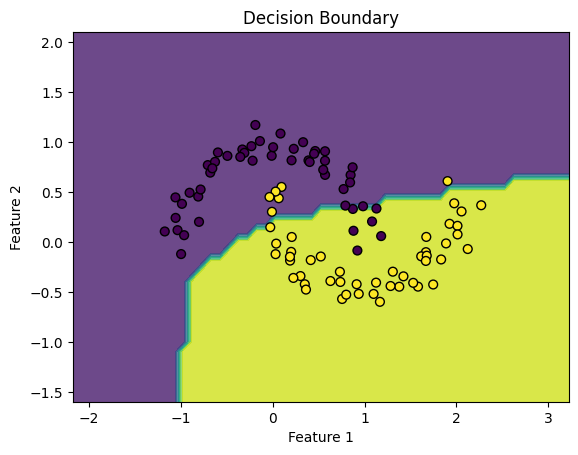

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Reshape to [batch_size, 1]

# Define a simple neural network
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(2, 5)   # Input size is 2, output size is 5
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5, 1)   # Input size is 5, output size is 1 (binary classification)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.sigmoid(x)

# Initialize the model, loss function, and optimizer
model = NeuralNet()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = (Z > 0.5).float()
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

# Evaluate the model
model.eval()
plot_decision_boundary(model, X, y)
plt.show()



**REGULARIZATION IN DEEP LEARNING**

Regularization techniques are used in machine learning to prevent overfitting by adding a penalty to the loss function that discourages large weights in the model. One common regularization technique is L2 regularization (also known as weight decay), which penalizes the squared magnitude of all model weights.

Below is the same code as above but with L2 regularization.

Epoch [100/1000], Loss: 0.4858
Epoch [200/1000], Loss: 0.3817
Epoch [300/1000], Loss: 0.3498
Epoch [400/1000], Loss: 0.3405
Epoch [500/1000], Loss: 0.3366
Epoch [600/1000], Loss: 0.3343
Epoch [700/1000], Loss: 0.3324
Epoch [800/1000], Loss: 0.3283
Epoch [900/1000], Loss: 0.3248
Epoch [1000/1000], Loss: 0.3222


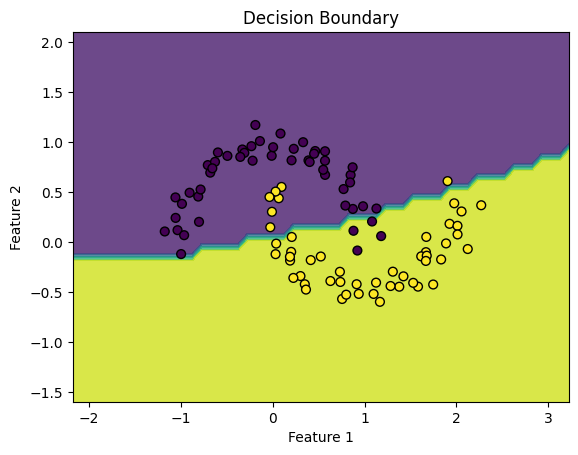

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Reshape to [batch_size, 1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define a simple neural network with L2 regularization
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(2, 5)   # Input size is 2, output size is 5
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5, 1)   # Input size is 5, output size is 1 (binary classification)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.sigmoid(x)

# Initialize the model
model = NeuralNet()

# Define L2 regularization parameter (weight decay)
weight_decay = 1e-4

# Define loss function and optimizer with L2 regularization
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=weight_decay)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1),
                            torch.arange(y_min, y_max, 0.1))
    inputs = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)
    Z = model(inputs)
    Z = (Z > 0.5).float()
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

plot_decision_boundary(model, X_tensor, y_tensor)
plt.show()


**CONVULATION NEURAL NETWORKS**

CNN stands for Convolutional Neural Network. It is a specialized type of neural network architecture designed for processing structured grid-like data, such as images or audio spectrograms. CNNs have revolutionized the field of computer vision and are widely used for tasks like image classification, object detection, segmentation, and more.

**Components of CNN:**

**Convolutional Layers:**

Convolutional layers are the core building blocks of CNNs. They consist of filters (also called kernels) that slide over the input image, performing element-wise multiplication and summation to produce feature maps. These filters capture spatial hierarchies of features in the input data.

**ReLU Activation:**

Rectified Linear Unit (ReLU) activation functions are applied after convolutional layers to introduce non-linearity, enabling the network to learn complex patterns and relationships in the data.

**Pooling Layers:**

Pooling layers (such as MaxPooling or AveragePooling) follow convolutional layers to reduce the spatial dimensions of each feature map while retaining important information. Pooling helps in controlling overfitting and reducing computational complexity.

**Fully Connected Layers:**

Fully connected (or dense) layers are typically found at the end of CNN architectures. These layers connect every neuron from the previous layer to every neuron in the next layer, eventually leading to the output layer. They are responsible for making predictions based on the features extracted by earlier layers.

**Output Layer:**

The final layer of a CNN produces the network's predictions. Depending on the task, it may have one or multiple neurons, each representing a class label (for classification tasks) or specific output values (for regression tasks).

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transforms for the dataset (normalization & augmentation)
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)  # 3 input channels (RGB), 6 output channels, kernel_size=5
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer with kernel_size=2, stride=2
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # 6 input channels, 16 output channels, kernel_size=5
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # Fully connected layer, input size 16*5*5, output size 120
        self.fc2 = nn.Linear(120, 84)  # Fully connected layer, input size 120, output size 84
        self.fc3 = nn.Linear(84, 10)  # Output layer, input size 84, output size 10 (number of classes)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))  # Convolution -> ReLU -> Max pooling
        x = self.pool(nn.functional.relu(self.conv2(x)))  # Convolution -> ReLU -> Max pooling
        x = x.view(-1, 16 * 5 * 5)  # Reshape tensor for fully connected layer input
        x = nn.functional.relu(self.fc1(x))  # Fully connected -> ReLU
        x = nn.functional.relu(self.fc2(x))  # Fully connected -> ReLU
        x = self.fc3(x)  # Output layer
        return x

# Initialize the model, loss function, and optimizer
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification tasks
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(trainloader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print('Finished Training')

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')


100%|██████████| 170498071/170498071 [00:03<00:00, 48367149.87it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1/10], Step [100/391], Loss: 2.3032
Epoch [1/10], Step [200/391], Loss: 2.3015
Epoch [1/10], Step [300/391], Loss: 2.3009
Epoch [2/10], Step [100/391], Loss: 2.2981
Epoch [2/10], Step [200/391], Loss: 2.2940
Epoch [2/10], Step [300/391], Loss: 2.2889
Epoch [3/10], Step [100/391], Loss: 2.2671
Epoch [3/10], Step [200/391], Loss: 2.2417
Epoch [3/10], Step [300/391], Loss: 2.2070
Epoch [4/10], Step [100/391], Loss: 2.1366
Epoch [4/10], Step [200/391], Loss: 2.0903
Epoch [4/10], Step [300/391], Loss: 2.0516
Epoch [5/10], Step [100/391], Loss: 2.0164
Epoch [5/10], Step [200/391], Loss: 1.9895
Epoch [5/10], Step [300/391], Loss: 1.9647
Epoch [6/10], Step [100/391], Loss: 1.9175
Epoch [6/10], Step [200/391], Loss: 1.9128
Epoch [6/10], Step [300/391], Loss: 1.8889
Epoch [7/10], Step [100/391], Loss: 1.8403
Epoch [7/10], Step [200/391], Loss: 1.8165
Epoch [7/10], Step [300/391], Loss: 1.8081
Epoch [8

**RNN :**

Recurrent Neural Networks (RNNs) are a class of neural networks particularly suited for sequential data, where the order of data points matters. They are designed to handle input data of variable length and are especially effective for tasks such as natural language processing (NLP), time series prediction, and sequence generation.

**Components of an RNN**

**Recurrent Connections:**

RNNs have recurrent connections that allow information to persist over time. Each neuron in the network has a self-connected loop, which means that the output at a particular time step depends not only on the current input but also on the previous inputs it has seen.

**Time Steps:**

The data in an RNN is processed in sequences or time steps. Each time step corresponds to a specific point in the sequence (e.g., a word in a sentence or a timestamp in a time series).

**Hidden State:**

At each time step, an RNN maintains a hidden state vector which summarizes the information about the sequence seen so far. This hidden state is updated at each time step based on the current input and the previous hidden state.

**TRANSFORMERS**

Transformers are a type of neural network architecture designed to handle sequential data efficiently, especially in natural language processing (NLP). They were introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017. Transformers have since become the backbone of many state-of-the-art NLP models due to their ability to model long-range dependencies and parallelize computation effectively.

**BERT (Bidirectional Encoder Representations from Transformers)**

BERT is a specific implementation of transformers developed by Google AI, introduced in the paper "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding" by Devlin et al. in 2018. BERT has significantly advanced the field of NLP by pre-training a deep bidirectional representation of language using transformers.

In [55]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Step 1: Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Step 2: Tokenize input text
inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")

# Step 3: Forward pass through the model
outputs = model(**inputs)

# Step 4: Output interpretation
logits = outputs.logits
predicted_class = torch.argmax(logits, dim=1).item()

print(f"Predicted class index: {predicted_class}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted class index: 1
